Foundation of AI Chatbot Bot

In [ ]:
with open('/content/dialogs.txt', 'r') as f:
  data = f.read()
f.close()
data = data.replace('\t', ' ')
data

'hi, how are you doing? i\'m fine. how about yourself?\ni\'m fine. how about yourself? i\'m pretty good. thanks for asking.\ni\'m pretty good. thanks for asking. no problem. so how have you been?\nno problem. so how have you been? i\'ve been great. what about you?\ni\'ve been great. what about you? i\'ve been good. i\'m in school right now.\ni\'ve been good. i\'m in school right now. what school do you go to?\nwhat school do you go to? i go to pcc.\ni go to pcc. do you like it there?\ndo you like it there? it\'s okay. it\'s a really big campus.\nit\'s okay. it\'s a really big campus. good luck with school.\ngood luck with school. thank you very much.\nhow\'s it going? i\'m doing well. how about you?\ni\'m doing well. how about you? never better, thanks.\nnever better, thanks. so how have you been lately?\nso how have you been lately? i\'ve actually been pretty good. you?\ni\'ve actually been pretty good. you? i\'m actually in school right now.\ni\'m actually in school right now. which 

In [ ]:
data = data.split('\n')
type(data)

list

In [ ]:
data[0]

"hi, how are you doing? i'm fine. how about yourself?"

In [ ]:
data = data[:500]

In [ ]:
# tokenization :: preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(oov_token = '<OOV>')

In [ ]:
tokenizer.fit_on_texts(data)

In [ ]:
# tokenizer.word_index
sequences = tokenizer.texts_to_sequences(data)

In [ ]:
sequences[0]

[359, 13, 29, 3, 139, 27, 360, 13, 41, 276]

In [ ]:
input_sequence = []

for sequence in sequences:
  # n_GRAM
  for i in range(1, len(sequence)):
    n_gram = sequence[: i + 1]
    input_sequence.append(n_gram)

In [ ]:
input_sequence

[[359, 13],
 [359, 13, 29],
 [359, 13, 29, 3],
 [359, 13, 29, 3, 139],
 [359, 13, 29, 3, 139, 27],
 [359, 13, 29, 3, 139, 27, 360],
 [359, 13, 29, 3, 139, 27, 360, 13],
 [359, 13, 29, 3, 139, 27, 360, 13, 41],
 [359, 13, 29, 3, 139, 27, 360, 13, 41, 276],
 [27, 360],
 [27, 360, 13],
 [27, 360, 13, 41],
 [27, 360, 13, 41, 276],
 [27, 360, 13, 41, 276, 27],
 [27, 360, 13, 41, 276, 27, 105],
 [27, 360, 13, 41, 276, 27, 105, 32],
 [27, 360, 13, 41, 276, 27, 105, 32, 54],
 [27, 360, 13, 41, 276, 27, 105, 32, 54, 47],
 [27, 360, 13, 41, 276, 27, 105, 32, 54, 47, 361],
 [27, 105],
 [27, 105, 32],
 [27, 105, 32, 54],
 [27, 105, 32, 54, 47],
 [27, 105, 32, 54, 47, 361],
 [27, 105, 32, 54, 47, 361, 36],
 [27, 105, 32, 54, 47, 361, 36, 160],
 [27, 105, 32, 54, 47, 361, 36, 160, 15],
 [27, 105, 32, 54, 47, 361, 36, 160, 15, 13],
 [27, 105, 32, 54, 47, 361, 36, 160, 15, 13, 22],
 [27, 105, 32, 54, 47, 361, 36, 160, 15, 13, 22, 3],
 [27, 105, 32, 54, 47, 361, 36, 160, 15, 13, 22, 3, 56],
 [36, 160],

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = max([len(x) for x in input_sequence])

In [ ]:
padded_input = pad_sequences(input_sequence, maxlen = max_len)

In [ ]:
padded_input[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       359,  13], dtype=int32)

In [ ]:
x_train  = padded_input[:, :-1]
y_train = padded_input[:, -1]

In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       359], dtype=int32)

In [ ]:
y_train[0]

13

In [ ]:
# yes, no
# [1 0]
# [0 1]

587

In [ ]:
total_words = len(tokenizer.word_index) + 1

In [ ]:
import tensorflow as tf


In [ ]:
# one hot encoding
y_train = tf.keras.utils.to_categorical(y = y_train, num_classes = total_words)

In [ ]:
# model implementation
# RNN - Recurrent Neural Network

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = total_words, output_dim = 120, input_length = max_len - 1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(units = total_words, activation = 'softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
history = model.fit(x = x_train, y = y_train, epochs=10, batch_size=40)

Epoch 1/10
162/162 [==============================] - 20s 126ms/step - loss: 4.7058 - accuracy: 0.1820
Epoch 2/10
162/162 [==============================] - 22s 136ms/step - loss: 4.2659 - accuracy: 0.2191
Epoch 3/10
162/162 [==============================] - 22s 136ms/step - loss: 4.0765 - accuracy: 0.2428
Epoch 4/10
162/162 [==============================] - 20s 126ms/step - loss: 5.2316 - accuracy: 0.2012
Epoch 5/10
162/162 [==============================] - 37s 229ms/step - loss: 4.7967 - accuracy: 0.2214
Epoch 6/10
162/162 [==============================] - 28s 173ms/step - loss: 4.8087 - accuracy: 0.2207
Epoch 7/10
162/162 [==============================] - 28s 170ms/step - loss: 4.5927 - accuracy: 0.2391
Epoch 8/10
162/162 [==============================] - 22s 136ms/step - loss: 4.4784 - accuracy: 0.2503
Epoch 9/10
162/162 [==============================] - 27s 170ms/step - loss: 4.4855 - accuracy: 0.2605
Epoch 10/10
162/162 [==============================] - 31s 189ms/step - l

In [ ]:
# predicting
test_data = [
    'i am fine what'
]
test_seq = tokenizer.texts_to_sequences(test_data)
padded_input = pad_sequences(test_seq, maxlen = max_len - 1)

In [ ]:
padded_input[0].size

27

In [ ]:
import numpy as np

In [ ]:
x_train[0].size

27

In [ ]:
predict = model.predict(x = padded_input)

1/1 [==============================] - 0s 31ms/step


In [ ]:
predict

array([[1.93633269e-08, 2.06052366e-08, 8.71537253e-03, 1.91605508e-01,
        7.15400325e-03, 1.05893137e-02, 6.50352100e-04, 6.68825442e-03,
        6.59361947e-04, 1.81774696e-04, 7.33820780e-05, 1.19198170e-02,
        2.00828305e-03, 5.42814005e-03, 3.98865495e-06, 1.35414070e-04,
        4.17902833e-03, 1.43765792e-05, 2.25708529e-04, 2.62427398e-06,
        9.17512152e-05, 5.68909862e-04, 4.77493135e-03, 3.39222439e-02,
        4.29813284e-03, 3.28504667e-03, 1.28286723e-02, 1.02873564e-04,
        1.00551668e-04, 1.22843292e-02, 2.91446177e-05, 4.50666630e-06,
        1.17533549e-03, 2.21322128e-03, 1.25391944e-03, 2.04108539e-04,
        1.42540066e-02, 5.58061525e-04, 9.92554945e-08, 4.91151540e-03,
        4.33419445e-05, 5.90234511e-02, 2.46813113e-04, 7.23649600e-06,
        5.87571645e-03, 7.53469658e-06, 6.67546907e-09, 5.10885555e-04,
        6.69860310e-06, 4.81974348e-05, 3.95713359e-05, 7.80666994e-07,
        5.68883843e-04, 1.19312035e-05, 3.65192318e-05, 9.148286

In [ ]:
pred_index = np.argmax(predict)

In [ ]:
tokenizer.index_word[pred_index]

'made'

In [ ]:
# plotting accuracy
import matplotlib.pyplot as plt


In [ ]:
y = history.history['accuracy']

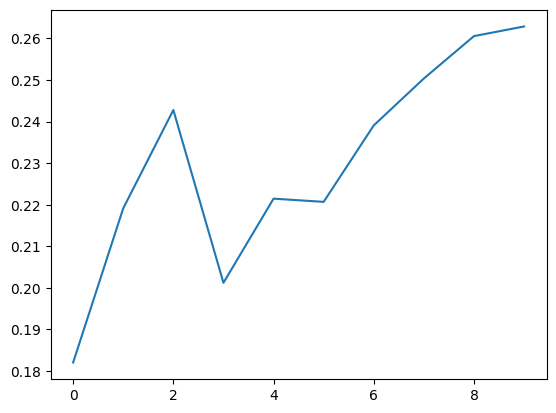

In [ ]:
plt.plot(y)